# Preprocessing Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')  
from models.svm import SVM

In [21]:
import os
print(os.getcwd())

/Users/jaylee/Documents/CS506/CASCS506-FinalProject/notebooks


In [22]:
# Load the TSV Data File
# df = pd.read_csv('./data/aml_ohsu_2022_clinical_data.tsv', sep='\t') # load the data (tsv file so need to specify sep)
df = pd.read_csv('../data/breast_cancer.csv') # load the data 

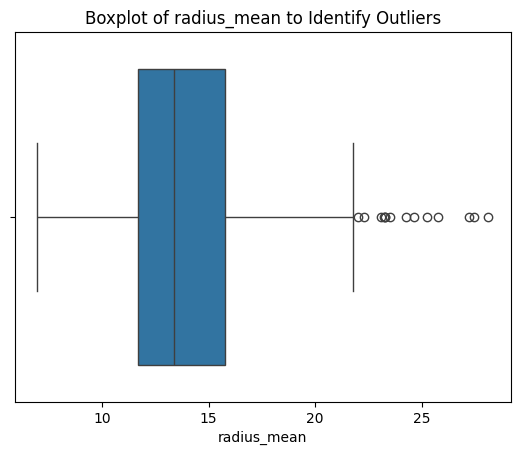

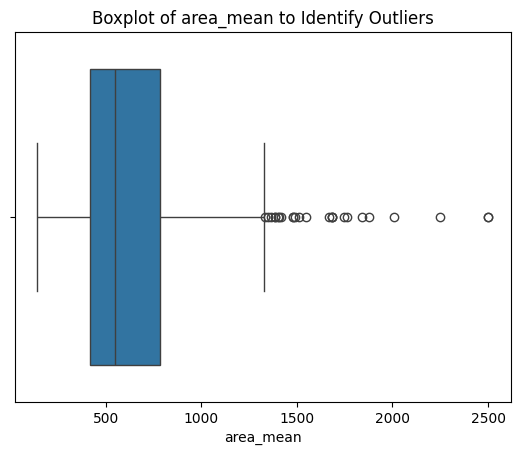

Data Shape after Outlier Removal: (544, 32)


In [23]:
# Outlier Detection and Handling Code
# Identifying outliers in 'radius_mean' and 'area_mean' using boxplots
for column in ['radius_mean', 'area_mean']:
    plt.figure()
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} to Identify Outliers')
    plt.xlabel(column)
    plt.show()

# Handling outliers: Removing rows where 'radius_mean' or 'area_mean' are beyond 1.5 times the IQR
Q1 = df[['radius_mean', 'area_mean']].quantile(0.25)
Q3 = df[['radius_mean', 'area_mean']].quantile(0.75)
IQR = Q3 - Q1

# Filtering data to remove outliers
df = df[~((df[['radius_mean', 'area_mean']] < (Q1 - 1.5 * IQR)) | (df[['radius_mean', 'area_mean']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data Shape after Outlier Removal:", df.shape)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_df = df.select_dtypes(include=['number'])
# Select numeric columns for normalization or standardization
numeric_columns = numeric_df.columns 

# Using StandardScaler to standardize numeric features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Alternatively, use MinMaxScaler for normalization
# minmax_scaler = MinMaxScaler()
# df[numeric_columns] = minmax_scaler.fit_transform(df[numeric_columns])

print("Data after Standardization:")
df.head()

Data after Standardization:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.232673,M,1.431985,-2.049264,1.643846,1.437201,1.609820,3.506035,3.092072,3.047488,...,2.369714,-1.338944,2.878823,2.769892,1.311223,2.678113,2.227969,2.529901,2.733861,1.909210
1,-0.232671,M,2.296479,-0.325132,2.136775,2.626377,-0.802250,-0.447262,0.077827,0.755891,...,2.274195,-0.346475,1.965281,2.626143,-0.355442,-0.397224,-0.092941,1.243186,-0.242725,0.274857
2,0.487919,M,2.001613,0.486774,1.995241,2.176319,0.979213,1.167358,1.640088,2.475557,...,1.926408,-0.000417,1.742206,2.062556,0.538654,1.130172,0.937478,2.166898,1.145062,0.196093
3,0.488328,M,-0.769459,0.283797,-0.563109,-0.812719,3.336821,3.631215,2.262165,1.799367,...,-0.194603,0.157921,-0.156758,-0.541579,3.377194,3.966673,2.104596,2.401878,6.009554,4.868332
4,0.488415,M,2.202658,-1.125372,2.244145,2.520265,0.312777,0.628887,1.648571,1.772558,...,1.674140,-1.446679,1.731584,1.756805,0.234835,-0.279090,0.688756,0.862357,-0.863450,-0.394638


In [25]:
# Feature Engineering Code
# Create a new feature: ratio of 'area_mean' to 'radius_mean'
df['area_to_radius_ratio'] = df['area_mean'] / df['radius_mean']
print("New Feature Created: area_to_radius_ratio")

# Example: Create interaction features
df['texture_radius_interaction'] = df['texture_mean'] * df['radius_mean']
print("New Feature Created: texture_radius_interaction")

# Create additional feature: Mean features group average and standard deviation
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df['mean_features_avg'] = df[mean_features].mean(axis=1)
df['mean_features_std'] = df[mean_features].std(axis=1)
print("New Features Created: mean_features_avg, mean_features_std")

# Create additional feature: Ratio of 'area_worst' to 'perimeter_worst'
df['area_to_perimeter_worst_ratio'] = df['area_worst'] / df['perimeter_worst']
print("New Feature Created: area_to_perimeter_worst_ratio")

# Create additional feature: Variation between worst and mean values
for feature in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']:
    df[f'{feature}_variation'] = df[f'{feature}_worst'] - df[f'{feature}_mean']
    print(f"New Feature Created: {feature}_variation")

# Encode categorical feature 'diagnosis'
from sklearn.preprocessing import LabelEncoder
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
print("Categorical Feature 'diagnosis' encoded as numerical values")

# Feature Engineering Code
# Create a new feature: ratio of 'area_mean' to 'radius_mean'
df['area_to_radius_ratio'] = df['area_mean'] / df['radius_mean']
print("New Feature Created: area_to_radius_ratio")

# Example: Create interaction features
df['texture_radius_interaction'] = df['texture_mean'] * df['radius_mean']
print("New Feature Created: texture_radius_interaction")

New Feature Created: area_to_radius_ratio
New Feature Created: texture_radius_interaction
New Features Created: mean_features_avg, mean_features_std
New Feature Created: area_to_perimeter_worst_ratio
New Feature Created: radius_variation
New Feature Created: texture_variation
New Feature Created: perimeter_variation
New Feature Created: area_variation
New Feature Created: smoothness_variation
New Feature Created: compactness_variation
New Feature Created: concavity_variation
New Feature Created: concave points_variation
New Feature Created: symmetry_variation
New Feature Created: fractal_dimension_variation
Categorical Feature 'diagnosis' encoded as numerical values
New Feature Created: area_to_radius_ratio
New Feature Created: texture_radius_interaction


In [27]:
df.to_csv('../data/preprocessed_data.csv', index=False)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from svm import SVM

df = pd.read_csv('../data/preprocessed_data.csv')

## Model Training

In [29]:
# STEP 2 MODEL TRAINING
from sklearn.model_selection import train_test_split

train = df
train = train.drop(columns="id")
X_train = train[train['diagnosis'].notnull()]

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['diagnosis']),
    X_train['diagnosis'],
    test_size=1/4.0,
    random_state=0
)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("split data...")

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

(408, 45)
(136, 45)
(408,)
(136,)
split data...


### Initiate Model

In [ ]:
from models.svm import SVM
svc = SVM(learning_rate=0.001, C=1.0, n_iters=2)

svc.fit(X_train, Y_train)
print(X_train)
y_pred = svc.predict(X_test)
print(y_pred)
y_pred = np.where(y_pred == -1, 0, y_pred)

[[ 0.59429718  0.1881417   0.648227   ...  0.28589975  0.01226792
   0.3423308 ]
 [-0.32380894 -0.57476948 -0.32250132 ... -0.02511808 -0.87477441
  -0.38026682]
 [ 0.4033043  -0.9877214   0.35783818 ...  0.46259873  0.09737634
   0.80952061]
 ...
 [-0.42098075  1.13769781 -0.25124625 ...  0.59992057  1.53779041
   4.00478957]
 [-0.08590553  2.11058454 -0.15754096 ...  0.16740974  1.08259476
   0.01405119]
 [ 1.83072475  0.77607325  1.87322855 ...  0.31395199  0.61606054
   1.5254487 ]]
[-1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.
  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.
  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy on testing set = ", accuracy_score(Y_test, y_pred))

Accuracy on testing set =  0.9191176470588235


In [ ]:
y_pred = pd.DataFrame(y_pred)
print(y_pred.shape)